# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

In [15]:
# Build query URL ***********is current weather the right query to use?
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units=imperial&q=" 

#record counter
count = 1

#blank lists for data
cloudiness=[]
country=[]
date=[]
humidity=[]
max_temp=[]
wind_speed=[]
long=[]
lati=[]
cities_found=[]

print(f"Beginning Data Retrieval:\n-----------------------------")

#loop through each city and append appropriate data
for city in cities:    
    try:
        weather_json = requests.get(query_url + city).json()
        
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])   
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        long.append(weather_json['coord']['lon'])
        lati.append(weather_json['coord']['lat'])
        cities_found.append(weather_json['name'])
        
        print(f"Processing Record {count} | {city}")
        count += 1
        
    except:
        print(f"City {city} not found. Skipping...")
        pass

Beginning Data Retrieval:
-----------------------------
Processing Record 1 | punta arenas
Processing Record 2 | lorengau
City aflu not found. Skipping...
City nizhneyansk not found. Skipping...
Processing Record 3 | ushuaia
Processing Record 4 | kruisfontein
Processing Record 5 | rikitea
Processing Record 6 | dicabisagan
Processing Record 7 | butaritari
Processing Record 8 | pauini
Processing Record 9 | teahupoo
Processing Record 10 | manacapuru
Processing Record 11 | los llanos de aridane
Processing Record 12 | cape town
Processing Record 13 | bubaque
City marcona not found. Skipping...
Processing Record 14 | mehamn
Processing Record 15 | port alfred
Processing Record 16 | shahreza
Processing Record 17 | caravelas
Processing Record 18 | kiunga
Processing Record 19 | acapulco
Processing Record 20 | skibbereen
Processing Record 21 | udachnyy
Processing Record 22 | iraquara
City belushya guba not found. Skipping...
Processing Record 23 | vaini
Processing Record 24 | puerto madero
Proces

Processing Record 221 | talnakh
City mys shmidta not found. Skipping...
City lolua not found. Skipping...
Processing Record 222 | bakaly
Processing Record 223 | ballsh
Processing Record 224 | porto empedocle
Processing Record 225 | ihosy
Processing Record 226 | lithakia
City ambodifototra not found. Skipping...
Processing Record 227 | rawah
Processing Record 228 | yar-sale
Processing Record 229 | geraldton
Processing Record 230 | jalu
City grand river south east not found. Skipping...
Processing Record 231 | thompson
Processing Record 232 | taiobeiras
Processing Record 233 | kampong chhnang
Processing Record 234 | buraydah
Processing Record 235 | mattru
Processing Record 236 | naze
Processing Record 237 | hobyo
Processing Record 238 | kampot
Processing Record 239 | orasac
Processing Record 240 | palmer
City dolbeau not found. Skipping...
Processing Record 241 | wad madani
City amderma not found. Skipping...
Processing Record 242 | lisala
Processing Record 243 | san policarpo
Processing

Processing Record 443 | guerrero negro
Processing Record 444 | lamu
Processing Record 445 | praia da vitoria
Processing Record 446 | bandarbeyla
Processing Record 447 | mweka
Processing Record 448 | ocean city
City khonuu not found. Skipping...
Processing Record 449 | masvingo
Processing Record 450 | bereda
Processing Record 451 | mangrol
Processing Record 452 | tigil
Processing Record 453 | santo antonio de jesus
Processing Record 454 | llangefni
Processing Record 455 | tamparan
Processing Record 456 | filingue
City saryshagan not found. Skipping...
Processing Record 457 | cockburn town
Processing Record 458 | berdigestyakh
Processing Record 459 | inongo
City umzimvubu not found. Skipping...
Processing Record 460 | vila
Processing Record 461 | cabo san lucas
Processing Record 462 | safranbolu
Processing Record 463 | tshikapa
Processing Record 464 | nantucket
Processing Record 465 | manzhouli
Processing Record 466 | ostrovnoy
Processing Record 467 | ambon
Processing Record 468 | necoch

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
#make data frame
city_weather_df = pd.DataFrame({
    'City': cities_found,
    'Lat': lati,
    'Lng': long,
    'Max Temp':max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed':wind_speed,
    'Country': country,
    'Date':date
})

#display DF
city_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,41.02,93,75,25.32,CL,1635180563
1,Lorengau,-2.0226,147.2712,81.23,77,35,4.76,PG,1635180563
2,Ushuaia,-54.8000,-68.3000,37.02,86,40,31.07,AR,1635180563
3,Kruisfontein,-34.0033,24.7314,64.89,81,1,14.18,ZA,1635180563
4,Rikitea,-23.1203,-134.9692,74.62,73,100,19.15,PF,1635180564


In [20]:
#export DF to csv file
city_weather_df.to_csv("../" + output_data_file)

In [52]:
#summary stats for df
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,21.440701,24.324402,59.884823,71.281915,56.173759,7.628404,1.635186e+09
std,33.030762,90.179761,22.838765,22.313214,37.733923,5.449687,8.627849e+01
min,-54.800000,-175.200000,-20.490000,6.000000,0.000000,0.000000,1.635185e+09
25%,-3.836550,-54.974600,44.467500,60.000000,20.000000,3.600000,1.635186e+09
50%,25.277500,25.876850,65.385000,77.000000,67.000000,6.610000,1.635186e+09
75%,49.291725,106.958600,78.262500,88.000000,92.000000,10.412500,1.635186e+09
max,78.218600,179.316700,98.130000,100.000000,100.000000,34.520000,1.635186e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [18]:
x_latitude = city_weather_df["Lat"]

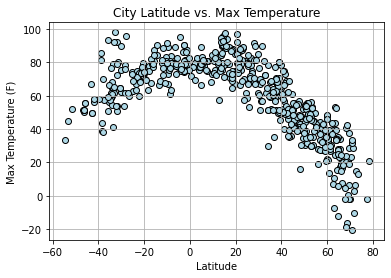

In [21]:
plt.scatter(x_latitude, city_weather_df["Max Temp"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

plt.savefig("../output_data/max_temp")

## Latitude vs. Humidity Plot

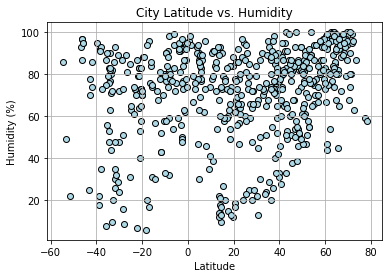

In [22]:
plt.scatter(x_latitude, city_weather_df["Humidity"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("../output_data/humidity")

## Latitude vs. Cloudiness Plot

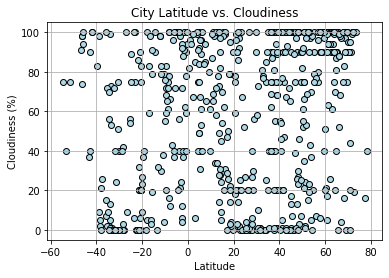

In [23]:
plt.scatter(x_latitude, city_weather_df["Cloudiness"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("../output_data/Cloudiness")

## Latitude vs. Wind Speed Plot

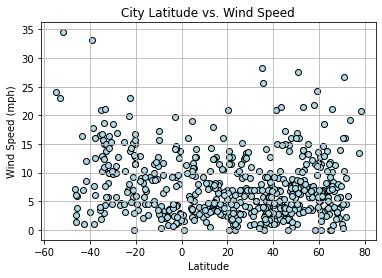

In [24]:
plt.scatter(x_latitude, city_weather_df["Wind Speed"], facecolor="lightblue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("../output_data/wind_speed")

## Linear Regression

In [57]:
#separate latitude into north (>0) and south (<0) for x axes
x_north_lat = x_latitude.loc[x_latitude > 0]
x_south_lat = x_latitude.loc[x_latitude <= 0]

In [77]:
north_lat_city_weather_df = city_weather_df.loc[city_weather_df["Lat"] > 0]
south_lat_city_weather_df = city_weather_df.loc[city_weather_df["Lat"] <= 0]

In [79]:
#set columns as variables for y axes
y_north_max_temp = north_lat_city_weather_df["Max Temp"]
#y_humid = city_weather_df["Humidity"]
#y_cloudy = city_weather_df["Cloudiness"]
#y_wind_speed = city_weather_df["Wind Speed"]

In [97]:
city_weather_df.loc[city_weather_df["Lat"] > 0, city_weather_df["Lat"]]#*****************

KeyError: "None of [Float64Index([   19.75,     19.8,  65.6145,   48.432, -33.9258, -21.2078,\n                77.484,  -3.6954,  60.7167,    -54.8,\n              ...\n               50.6996,  68.0546, -10.1667,   -3.945,  36.4295,  39.0911,\n               25.5333,     57.8,    22.05,   2.3284],\n             dtype='float64', length=564)] are in the [columns]"

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.76201


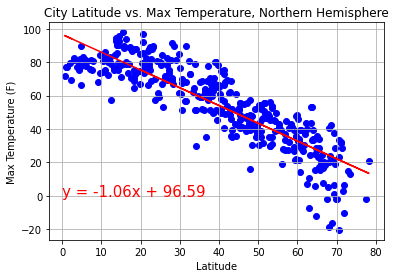

In [85]:
plt.scatter(x_north_lat, y_north_max_temp, facecolor="blue")
plt.title("City Latitude vs. Max Temperature, Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north_lat, y_north_max_temp)
regress_values = x_north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_north_lat,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
print(f"The r-squared value is: {round(rvalue**2, 5)}")

The r-value is: 0.46937863826630627


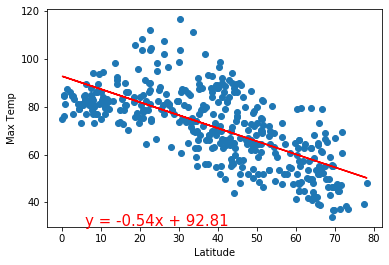

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


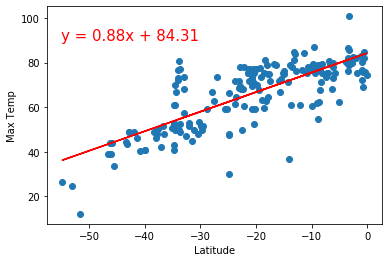

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


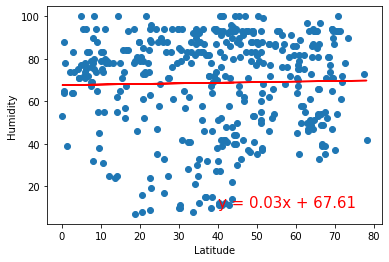

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


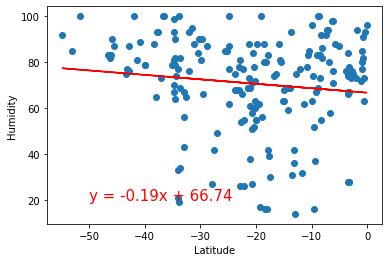

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


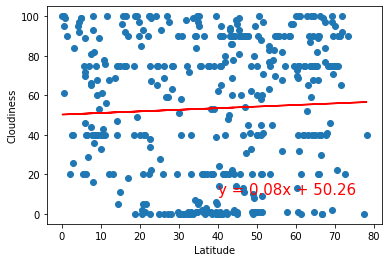

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


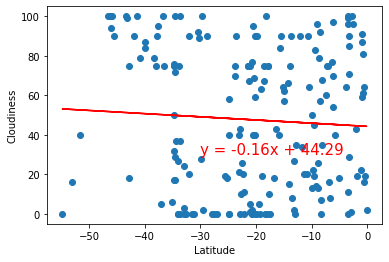

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


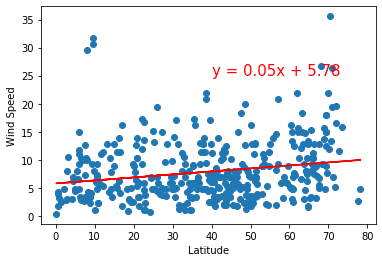

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


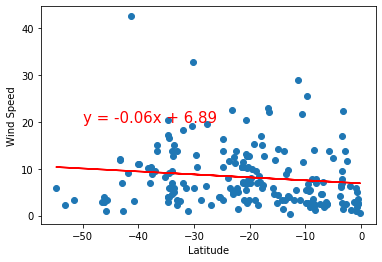